<a href="https://colab.research.google.com/github/ahnafsayem/EDA-projects/blob/main/Uefa-Champions-League-(2016-2022)-EDA/UCL_(2016_22)_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kicking Off Insights: UEFA Champions League Data Exploration from 2016 to 2022**

---


>  This dataset dives into the **UEFA Champions League** from **2016 to 2022**, capturing key details about teams, stadiums, players and match outcomes. It provides a rich view of the competition's landscape over these years, helping us explore patterns, standout performances, and the biggest stages of European football



---




## *Primary Aanalysis*

Importing Libraries

In [1054]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [1055]:
path = "/content/UEFA Champions League 2016-2022 Data.xlsx"

In [1056]:
df_teams = pd.read_excel(path, sheet_name = 'teams')
df_stadiums = pd.read_excel(path, sheet_name = 'stadiums')
df_players = pd.read_excel(path, sheet_name = 'players')
df_matches = pd.read_excel(path, sheet_name = 'matches')
df_managers = pd.read_excel(path, sheet_name = 'managers')
df_goals = pd.read_excel(path, sheet_name = 'goals')

In [1057]:
df_teams.head(3)

,TEAM_NAME,COUNTRY,HOME_STADIUM
0,AC Milan,Italy,Giuseppe Meazza
1,AFC Ajax,Netherlands,Johan Cruijff ArenA
2,Atalanta,Italy,Gewiss Stadium


In [1058]:
df_stadiums.head(3)

,NAME,CITY,COUNTRY,CAPACITY
0,Giuseppe Meazza,Milano,Italy,75923
1,Johan Cruijff ArenA,Amsterdam,Netherlands,54990
2,Gewiss Stadium,Bergamo,Italy,26562


In [1059]:
df_players.head(3)

,PLAYER_ID,FIRST_NAME,LAST_NAME,NATIONALITY,DOB,TEAM,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FOOT
0,ply510,NaN,Danilo,Brazil,1991-07-15,Juventus,6.0,Defender,184.0,78.0,R
1,ply511,Mattia De,Sciglio,Italy,1992-10-20,Juventus,2.0,Defender,182.0,78.0,R
2,ply512,Federico,Gatti,Italy,1998-06-24,Juventus,15.0,Defender,190.0,84.0,R


In [1060]:
df_matches.head(3)

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,28-SEP-21 08.00.00.000000000 PM,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350


In [1061]:
df_managers.head(3)

,FIRST_NAME,LAST_NAME,NATIONALITY,DOB,TEAM
0,Stefano,Pioli,Italy,1965-10-19,AC Milan
1,Alfred,Schreuder,Netherlands,1972-11-02,AFC Ajax
2,Gian Piero,Gasperini,Italy,1958-01-26,Atalanta


In [1062]:
df_goals.head(3)

,GOAL_ID,MATCH_ID,PID,DURATION,ASSIST,GOAL_DESC
0,gl470,mt154,ply1479,4,ply864,right-footed shot
1,gl471,mt154,ply1075,28,ply864,penalty
2,gl472,mt154,ply585,69,ply864,right-footed shot


In [1063]:
# function for changing columns to lower case

def lower(df):
    df.columns = df.columns.str.lower()
    return df

In [1064]:
df_goals=lower(df_goals)
df_managers = lower(df_managers)
df_matches = lower(df_matches)
df_players = lower(df_players)
df_stadiums = lower(df_stadiums)
df_teams = lower(df_teams)

#checking one

df_players.head(3)

,player_id,first_name,last_name,nationality,dob,team,jersey_number,position,height,weight,foot
0,ply510,NaN,Danilo,Brazil,1991-07-15,Juventus,6.0,Defender,184.0,78.0,R
1,ply511,Mattia De,Sciglio,Italy,1992-10-20,Juventus,2.0,Defender,182.0,78.0,R
2,ply512,Federico,Gatti,Italy,1998-06-24,Juventus,15.0,Defender,190.0,84.0,R


In [1065]:
df_goals.head(3)

,goal_id,match_id,pid,duration,assist,goal_desc
0,gl470,mt154,ply1479,4,ply864,right-footed shot
1,gl471,mt154,ply1075,28,ply864,penalty
2,gl472,mt154,ply585,69,ply864,right-footed shot


In [1066]:
#giving a generic name for all the same data for easy analysis

df_goals.rename({"pid":"player_id","assist":"assist_id"},axis=1, inplace=True)

## **Some necessary insights**

From the dataset,primarily we have found that,


>  1. ***`df_teams`*** have three important parameters, *`team_name`*,*`country`* and *`home_stadium`*. So there is no need to drop any of those columns, and there is no chance of duplicate data also.
  
>  2. ***`df_stadiums`*** have four parameters, they are *`name`*,*`city`*,*`country`* and *`capacity`*. As we have the *`team_name`* and the *`home_stadium`* names, there is no need to have the *`city`* and *`country`* names, we can drop those from the ***`df_stadiums`*** sheet. We can also drop the duplicate names. These two sheets can be merged into one also by changing the *`name`* as *`home_stadium`* and connecting it with the respective team.

>  3. In the ***`df_players`*** sheet, the columns of *`first_name`* and *`last_name`* of the players can be merged into one column, and can be named as *`player_name`*. The *`weight`* and *`height`* column of the players information can be dropped as we are analyzing the performance of the players and the teams by their stat.

>  4. From the ***`df_managers`*** sheet, the *`first_name`* and *`last_name`* columns of the managers can be merged into one column, and can be named as *`manager_name`*.

>  5. From the ***`df_matches`*** sheet, *`date_time`* column can be dropped.

>  6. ***`df_goals`*** sheet can be merged with the ***`df_matches`*** based on the *`match_id`*, as it depicts data for the same match.

---



## *Analysis for **`df_teams`** and **`df_stadiums`** sheets.*

In [1067]:
df_teams.head(2)

,team_name,country,home_stadium
0,AC Milan,Italy,Giuseppe Meazza
1,AFC Ajax,Netherlands,Johan Cruijff ArenA


In [1068]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_name     74 non-null     object
 1   country       74 non-null     object
 2   home_stadium  74 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [1069]:
df_stadiums.head(2)

,name,city,country,capacity
0,Giuseppe Meazza,Milano,Italy,75923
1,Johan Cruijff ArenA,Amsterdam,Netherlands,54990


In [1070]:
#dropping parameters

df_stadiums.drop(["city", "country"], axis=1, inplace=True)
df_stadiums.head(2)

,name,capacity
0,Giuseppe Meazza,75923
1,Johan Cruijff ArenA,54990


In [1071]:
#renaming the parameter

df_stadiums.rename({"name":"home_stadium"},axis=1, inplace=True)
df_stadiums.head(2)

,home_stadium,capacity
0,Giuseppe Meazza,75923
1,Johan Cruijff ArenA,54990


In [1072]:
df_stadiums.drop_duplicates('home_stadium', keep = 'first', inplace=True)

In [1073]:
df_stadiums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 85
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   home_stadium  85 non-null     object
 1   capacity      85 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [1074]:
df_teams_merged = pd.merge(df_teams, df_stadiums, on='home_stadium', how='inner')

# Inner Merge (how='inner'): Keeps only rows that have a match in both DataFrames
df_teams_merged.head(3)

,team_name,country,home_stadium,capacity
0,AC Milan,Italy,Giuseppe Meazza,75923
1,AFC Ajax,Netherlands,Johan Cruijff ArenA,54990
2,Atalanta,Italy,Gewiss Stadium,26562


In [1075]:
#Sorting the dataframe in descending order

df_teams_merged.sort_values(by='capacity', ascending=False, inplace=True) #Sorting the teams based on spectator capacity
df_teams_merged.reset_index(drop=True, inplace=True) #reseting index

df_teams_merged.head(3)

,team_name,country,home_stadium,capacity
0,FC Barcelona,Spain,Spotify Camp Nou,99354
1,Borussia Dortmund,Germany,Signal Iduna Park,81365
2,Real Madrid,Spain,Santiago Bernabéu,81044


In [1076]:
df_teams_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_name     74 non-null     object
 1   country       74 non-null     object
 2   home_stadium  74 non-null     object
 3   capacity      74 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.4+ KB


<ipython-input-1077-cf18ce914231>:5: UserWarning: 
The palette list has fewer values (5) than needed (74) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( data = df_teams_merged,


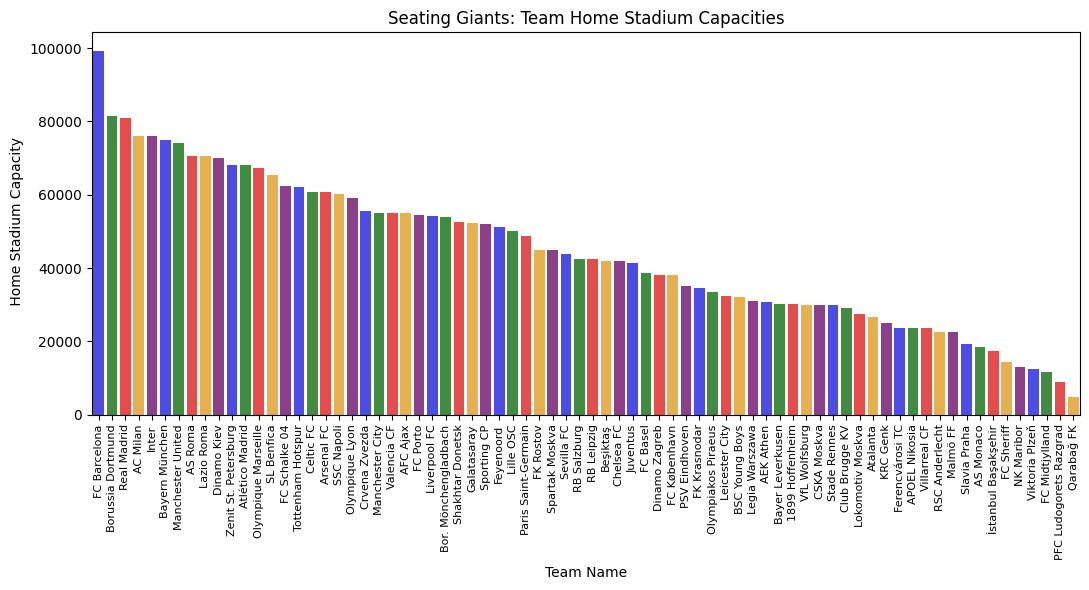

In [1077]:
#Plotting the Teams vs Stadium Capacity Dataset
plt.figure(figsize=(11, 6))

colors = ['blue', 'green', 'red', 'orange', 'purple']
sns.barplot( data = df_teams_merged,
            x="team_name",
           y="capacity",

             hue="team_name",
             legend=False,
            palette= colors,
           alpha=0.8)

plt.xlabel("Team Name")
plt.ylabel(" Home Stadium Capacity")

plt.title("Seating Giants: Team Home Stadium Capacities")
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

The bar chart showcases the massive stadiums of Europe’s most iconic football clubs, each one a fortress for its loyal fans.

> At the top is **FC Barcelona's Camp Nou**, which can hold an astounding **99,354** spectators, making it the largest stadium in this lineup. Not far behind is **Borussia Dortmund’s Signal Iduna Park**, with room for **81,365** fans, famous for the crazy fanbase and the electric energy of "Yellow Wall." And, of course, in the third place there's **Real Madrid's Santiago Bernabeu**—smaller by just a fraction at **81,044**, but home to a football dynasty. With more **UEFA Champions League** titles than any other club, the Bernabeu is where legends are made. Spain shines with two of the top three largest stadiums on this list, a testament to the country’s deep passion for football and its rich history in the sport’s most iconic moments.


---

## *Analysis for **`df_players`** dataframe.*

### **Preparing the data**

In [1078]:
df_players.head(2)

,player_id,first_name,last_name,nationality,dob,team,jersey_number,position,height,weight,foot
0,ply510,NaN,Danilo,Brazil,1991-07-15,Juventus,6.0,Defender,184.0,78.0,R
1,ply511,Mattia De,Sciglio,Italy,1992-10-20,Juventus,2.0,Defender,182.0,78.0,R


In [1079]:
'''
  merging the first & last name of every players

'''
# Replace NaN in first_name with an empty string
df_players['first_name'] = df_players['first_name'].fillna('')

# Merging first name and last name into a new column called 'full_name'
df_players['full_name'] = df_players['first_name'] + ' ' + df_players['last_name']

#dropping unnecessary columns
df_players.drop(["first_name", "last_name","height","weight"],
                axis=1, inplace=True)

df_players.head(3)

,player_id,nationality,dob,team,jersey_number,position,foot,full_name
0,ply510,Brazil,1991-07-15,Juventus,6.0,Defender,R,Danilo
1,ply511,Italy,1992-10-20,Juventus,2.0,Defender,R,Mattia De Sciglio
2,ply512,Italy,1998-06-24,Juventus,15.0,Defender,R,Federico Gatti


In [1080]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   player_id      2769 non-null   object        
 1   nationality    2769 non-null   object        
 2   dob            2755 non-null   datetime64[ns]
 3   team           2330 non-null   object        
 4   jersey_number  2453 non-null   float64       
 5   position       2769 non-null   object        
 6   foot           2320 non-null   object        
 7   full_name      2769 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 173.2+ KB


### **Footedness of players in UCL**

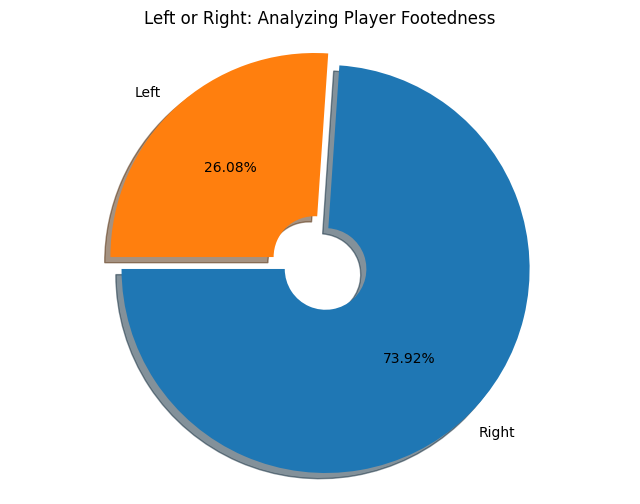

In [1081]:
foot = df_players['foot'].value_counts()

#changing the index
foot.index = foot.index.map({'R': 'Right', 'L': 'Left'}.get)

#plotting Pie chart

plt.figure(figsize=(8, 6))
plt.pie(foot, labels=foot.index, autopct="%1.2f%%",
        explode=(0.08,0),shadow=True, startangle=180,wedgeprops=dict(width=0.8))

plt.title("Left or Right: Analyzing Player Footedness")
plt.axis('equal') # Ensures equal aspect ratio

plt.show()



> In our analysis of player footedness, we found that approximately **73.92%** of players are **right-footed**, while the remaining **26.08%** of them are **left-footed**. This significant majority indicates a dominance of right-footed techniques and training methods in football, which could influence team strategies and playstyles, often favoring right-sided maneuvers. The imbalance highlights the importance of developing left-footed talent to diversify skills across teams, making them less predictable and more versatile.



---



### **Players played in different position**

In [1082]:
df_players['position'].unique()

array(['Defender', 'Midfielder', 'Forward', 'Goalkeeper', 'Goalkeeping',
       'Fitness', 'Rehab', 'Physical', 'Individual', 'Technique',
       'Special', 'Game', 'Video', 'Chief', '08/2022', 'Athletic',
       '02/2022', '07/2021', '05/2020', 'Arabia', 'Republic', 'Emirates',
       '07/2006', '07/2010', 'Rica'], dtype=object)



> We are observing the presence of numerous irrelevant entries. The primary positions on the field include *Goalkeeper, Defender, Midfielder*, and *Forward*. So, we will eliminate any unnecessary rows that include any irrelavent data on the players' list.



In [1083]:
# Values to keep
values_to_keep = ['Goalkeeper', 'Defender','Midfielder','Forward']

# Filter DataFrame to keep only specific rows
df_players_filtered = df_players[df_players['position'].isin(values_to_keep)]

df_players = df_players_filtered

# Datas can also be removed by using "values_to_remove" function.
# Used what is more convenient.

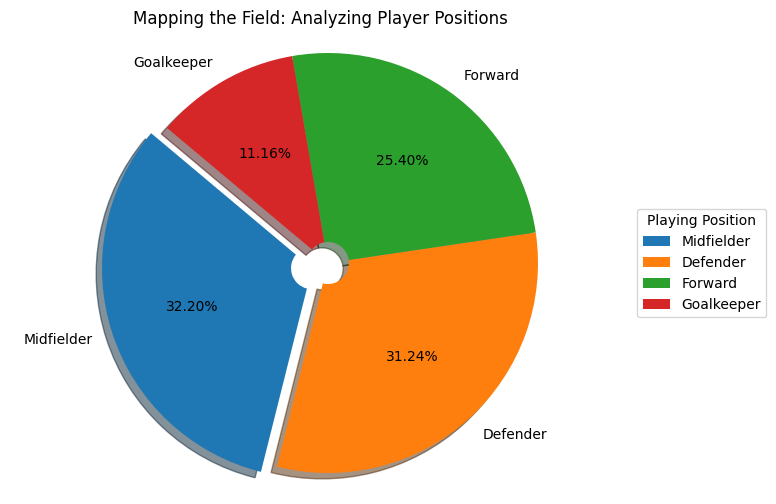

In [1084]:
""""
  Visualizing in the Pie Chart.
"""

position = df_players['position'].value_counts()

plt.figure(figsize=(8, 6))

plt.pie(position, labels=position.index, autopct="%1.2f%%",
        explode=(0.08,0,0,0), shadow=True, startangle=140,
        wedgeprops=dict(width=0.9))

plt.legend(position.index, title="Playing Position", loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.title("Mapping the Field: Analyzing Player Positions")
plt.axis('equal') # Ensures equal aspect ratio

plt.show()



> In the analysis of player positions, we observe a balanced distribution across key roles on the field. **Midfielders** make up the largest group at **32.20%**, reflecting the central importance of this position in linking defense and attack, controlling possession, and dictating the flow of the game. **Defenders** closely follow at **31.24%**, highlighting the critical need for strong defensive units to maintain structure and resist opposition pressure. **Forwards**, at **25.40%**, play a vital role in goal-scoring efforts, showcasing the focus on attack in modern football. Finally, **Goalkeepers** make up **11.16%** of the player pool, consistent with the specialized nature of this position, as only one goalkeeper is needed per team on the pitch. This distribution illustrates the well-rounded structure required to form a cohesive and competitive football team, with an emphasis on balance across all areas of the field.

---







### **Number of Players by Country**

In [1085]:
country_counts = df_players['nationality'].value_counts()
country_counts.head(10)

,count
nationality,
France,190
Spain,168
Brazil,161
Russia,146
Germany,134
England,100
Portugal,98
Netherlands,96
Italy,93


<ipython-input-1086-1263732de1f9>:10: UserWarning: 
The palette list has fewer values (4) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


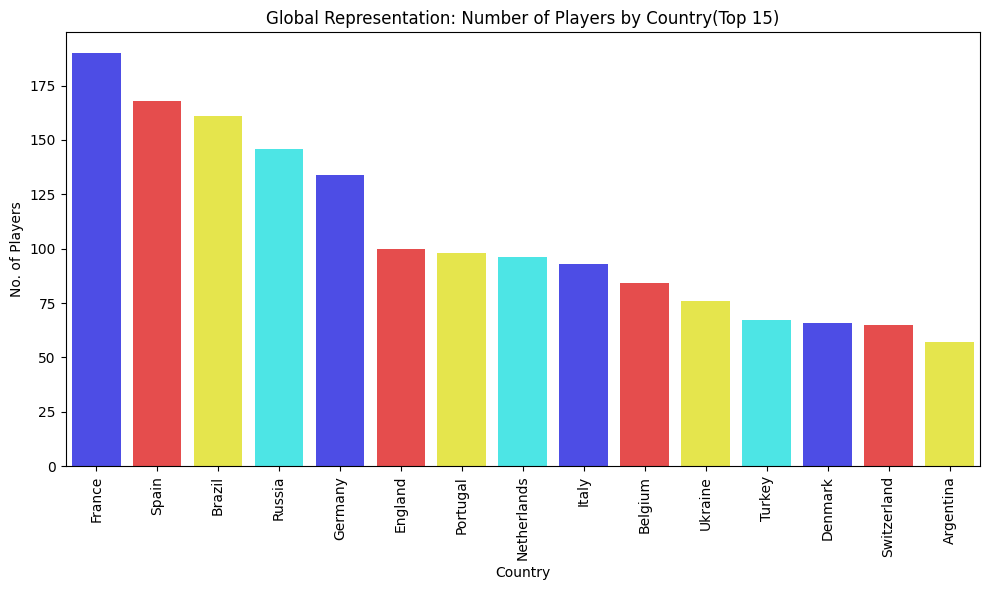

In [1086]:
#Plotting Number of Players by Country
country_counts = df_players['nationality'].value_counts()

plt.figure(figsize=(10, 6))

colors = ['blue','red','yellow','cyan']

top_country_counts = country_counts.head(15) #top 10 countries producing players

sns.barplot(
    x=top_country_counts.index.astype(str),  # Use index of country_counts as x-values
    y=top_country_counts.values,             # Use values of country_counts as y-values

    hue=top_country_counts.index.astype(str),
    legend=False,
    palette= colors,
    alpha=0.8
)

plt.xlabel("Country")
plt.ylabel("No. of Players")
plt.title("Global Representation: Number of Players by Country(Top 15)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> The data showcases the **immense global reach** of football, with **France** leading the way in the UEFA Champions League, contributing **190 players** to the competition. This underscores France's exceptional talent pipeline, consistently producing top-tier players for the world’s biggest football stage. **Spain** and **Brazil** are not far behind, with **168** and **161 players**, respectively, reflecting their rich footballing heritage and sustained excellence at both the club and international levels. **Russia**, with **146 players**, stands out as a key player in the Champions League landscape, while **Germany** and **England**—known for their fiercely competitive domestic leagues—add **134** and **100 players**, respectively. These nations continue to shape the tournament with their footballing prowess.

> **Portugal** and the **Netherlands**, despite their smaller size, punch above their weight, contributing **98** and **96 players**, thanks to their renowned football academies and emphasis on youth development. **Italy** and **Belgium**, rounding out the top 10 with **93** and **84 players**, highlight Europe's central role in the competition.

This distribution of players reflects the Champions League's status as the premier football competition, attracting the best talents from across Europe and Brazil, while showcasing the footballing dominance of these countries on the grandest of stages.

---

## *Analysis for **`df_managers`** dataframe.*

In [1087]:
df_managers.head(2)

,first_name,last_name,nationality,dob,team
0,Stefano,Pioli,Italy,1965-10-19,AC Milan
1,Alfred,Schreuder,Netherlands,1972-11-02,AFC Ajax


In [1088]:
'''
  merging the first & last name of every managers

'''
# Replace NaN in first_name with an empty string
df_managers['first_name'] = df_managers['first_name'].fillna('')

# Merging first name and last name into a new column called 'full_name'
df_managers['full_name'] = df_managers['first_name'] + ' ' + df_managers['last_name']

#dropping unnecessary columns
df_managers.drop(["first_name", "last_name"],
                axis=1, inplace=True)

df_managers.head(3)

,nationality,dob,team,full_name
0,Italy,1965-10-19,AC Milan,Stefano Pioli
1,Netherlands,1972-11-02,AFC Ajax,Alfred Schreuder
2,Italy,1958-01-26,Atalanta,Gian Piero Gasperini


In [1089]:
new_order = ["full_name","dob", "nationality", "team"]
df_managers = df_managers[new_order]
df_managers.head(3)

,full_name,dob,nationality,team
0,Stefano Pioli,1965-10-19,Italy,AC Milan
1,Alfred Schreuder,1972-11-02,Netherlands,AFC Ajax
2,Gian Piero Gasperini,1958-01-26,Italy,Atalanta


want to find the oldest and the youngest managers in the UCL managed in the time frame of 2016 to 2022

In [1090]:
# Convert 'dob' column to datetime
df_managers['dob'] = pd.to_datetime(df_managers['dob'])

# Calculate age as of 2022
df_managers['age'] = 2022 - df_managers['dob'].dt.year

# Find the youngest and oldest manager
oldest_manager = df_managers.loc[df_managers['age'].idxmax()]
youngest_manager = df_managers.loc[df_managers['age'].idxmin()]

# Display the results
print("Oldest Manager:")
print(oldest_manager)

print("\nYoungest Manager:")
print(youngest_manager)

Oldest Manager:
full_name           Mircea Lucescu
dob            1945-07-29 00:00:00
nationality                Romania
team                   Dinamo Kiev
age                             77
Name: 10, dtype: object

Youngest Manager:
full_name        Guillermo Abascal
dob            1989-04-13 00:00:00
nationality                  Spain
team                Spartak Moskva
age                             33
Name: 66, dtype: object


> The oldest manager in the UEFA Champions League is **Mircea Lucescu** of **Dinamo Kiev**, born in **1945**, making him **77 years old** as of 2022. Lucescu's extensive experience and longevity in football management have made him a seasoned figure in European football. In contrast, the youngest manager is **Guillermo Abascal** of **Spartak Moskva**, born in **1989** and aged just **33**. Abascal represents a new generation of managers bringing fresh perspectives and strategies to the competition.

This contrast highlights the wide range of leadership styles and experiences present in the Champions League, from veteran managers like Lucescu to rising talents like Abascal.

## *Analysis for **`df_matches`** & **`df_goals`** dataframe.*

### **Preparing data for analysis**

In [1091]:
df_matches.head(2)

,match_id,season,date_time,home_team,away_team,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546


In [1092]:
df_goals.head(2)

,goal_id,match_id,player_id,duration,assist_id,goal_desc
0,gl470,mt154,ply1479,4,ply864,right-footed shot
1,gl471,mt154,ply1075,28,ply864,penalty


In [1093]:
df_matches_goals= pd.merge(df_matches, df_goals, on='match_id', how='inner')

# Inner Merge (how='inner'): Keeps only rows that have a match in both DataFrames
df_matches_goals.head(2)

,match_id,season,date_time,home_team,away_team,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,goal_id,player_id,duration,assist_id,goal_desc
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl1,ply643,16,ply655,header
1,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl2,ply727,28,NaN,own goal


In [1094]:
df_matches_goals.drop(["date_time"], axis=1, inplace=True)
df_matches_goals.head(2)

,match_id,season,home_team,away_team,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,goal_id,player_id,duration,assist_id,goal_desc
0,mt1,2021-2022,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl1,ply643,16,ply655,header
1,mt1,2021-2022,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl2,ply727,28,NaN,own goal


In [1095]:
df_matches_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           2279 non-null   object
 1   season             2279 non-null   object
 2   home_team          2279 non-null   object
 3   away_team          2279 non-null   object
 4   stadium            2279 non-null   object
 5   home_team_score    2279 non-null   int64 
 6   away_team_score    2279 non-null   int64 
 7   penalty_shoot_out  2279 non-null   int64 
 8   attendance         2279 non-null   int64 
 9   goal_id            2279 non-null   object
 10  player_id          2176 non-null   object
 11  duration           2279 non-null   int64 
 12  assist_id          1605 non-null   object
 13  goal_desc          2263 non-null   object
dtypes: int64(5), object(9)
memory usage: 249.4+ KB


### **Teams with most matches and most wins**



---
As we merged two sheets based on *`match_id`*, duplicate values have appeared since multiple goals and assists can occur within a single match. To accurately determine the most wins per team, it's essential to first remove these duplicate entries to ensure a clean and precise analysis.

In [1096]:
df_winner_counts= df_matches_goals.drop_duplicates('match_id', keep = 'first')

In [1132]:
#Most matches analysis

# Counting matches played by each team
home_counts = df_winner_counts['home_team'].value_counts()
away_counts = df_winner_counts['away_team'].value_counts()

# Combining counts
total_counts = home_counts.add(away_counts, fill_value=0)

# Sorting and getting top teams
top_playing_teams = total_counts.sort_values(ascending=False)
top_playing_teams.head(10)

,count
Real Madrid,66
Bayern München,59
Manchester City,59
Paris Saint-Germain,55
Liverpool FC,54
Juventus,54
FC Barcelona,48
Borussia Dortmund,46
Atlético Madrid,46
Chelsea FC,38


In [ ]:
# Function to determine the winner
def find_winner(row):
    if row['home_team_score'] > row['away_team_score']:
        return row['home_team']
    elif row['home_team_score'] < row['away_team_score']:
        return row['away_team']
    else:
        return 'Draw'

# Apply the function to each row to create a new column for the winner
df_winner_counts['winner'] = df_winner_counts.apply(find_winner, axis=1)

In [1098]:
df_winner_counts.head(2)

,match_id,season,home_team,away_team,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,goal_id,player_id,duration,assist_id,goal_desc,winner
0,mt1,2021-2022,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl1,ply643,16,ply655,header,Manchester City
9,mt2,2021-2022,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546,gl10,ply1065,15,ply739,left-footed shot,Draw


In [1129]:
# Values to remove
values_to_remove = ['Draw']

# Filter DataFrame to remove specific rows
winner_counts= df_winner_counts[~df_winner_counts['winner'].isin(values_to_remove)]

In [1130]:
winner_counts= winner_counts['winner'].value_counts()
winner_counts.head(10)

,count
winner,
Bayern München,44
Real Madrid,41
Manchester City,40
Juventus,36
Liverpool FC,35
FC Barcelona,32
Paris Saint-Germain,31
Atlético Madrid,24
Chelsea FC,22


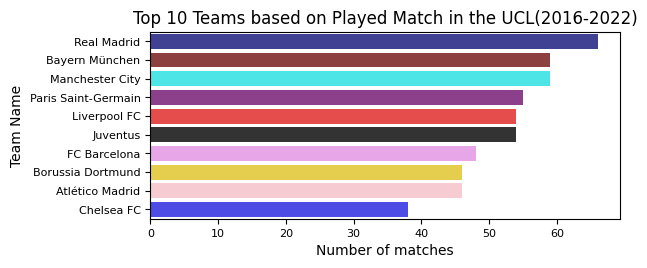

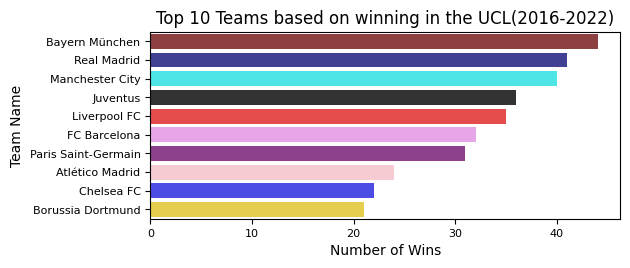

In [1142]:
'''
  Teams played in most matches
'''


top_played_teams = top_playing_teams.head(10)

plt.subplot(2, 1, 1)
colors = ['darkblue','maroon', 'cyan','purple', 'red','black','violet','gold','lightpink','blue']

sns.barplot(

    x=top_played_teams.values,             # Use values of country_counts as y-values
    y=top_played_teams.index.astype(str),  # Use index of country_counts as x-values

    orientation='horizontal',
    hue=top_played_teams.index.astype(str),
    legend=False,
    palette= colors,
    alpha=0.8
)

plt.xlabel("Number of matches",fontsize=10)
plt.ylabel("Team Name",fontsize=10)
plt.title("Top 10 Teams based on Played Match in the UCL(2016-2022)",fontsize=12)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()



'''
    Teams with most wins
'''

top_winner_counts = winner_counts.head(10)

plt.subplot(2, 1, 2)
colors = ['maroon','darkblue', 'cyan','black', 'red','violet','purple','lightpink','blue','gold']

sns.barplot(

    x=top_winner_counts.values,             # Use values of country_counts as y-values
    y=top_winner_counts.index.astype(str),  # Use index of country_counts as x-values

    orientation='horizontal',
    hue=top_winner_counts.index.astype(str),
    legend=False,
    palette= colors,
    alpha=0.8
)

plt.xlabel("Number of Wins",fontsize=10)
plt.ylabel("Team Name",fontsize=10)
plt.title("Top 10 Teams based on winning in the UCL(2016-2022)",fontsize=12)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

The bar chart shows the **Top 10** teams from UEFA Champions League that played most of the matches and most win tally from 2016 to 2022.It paints a fascinating picture of football excellence and rivalry.

***Most Played Matches in UCL(2016-2022)***

> In the UEFA Champions League from *2016 to 2022*, **Real Madrid** topped the charts as the team with the most matches played, participating in a remarkable **66** games. Following closely behind, **Bayern München** and **Manchester City** each played **59** matches, showcasing their consistency and competitiveness in the tournament. **Paris Saint-Germain** also had an impressive run with **55** matches, while **Liverpool FC** and **Juventus** each played **54** matches. Other notable teams include **FC Barcelona** with **48** matches and **Borussia Dortmund** and **Atlético Madrid**, both with **46** matches. Lastly, **Chelsea FC** rounded out the list with **38** matches. This data highlights the sustained engagement of these top clubs in one of the most prestigious football competitions in the world.


***Teams with most Wins in UCL(2016-2022)***

>  **Bayern München** leads with **44** wins, underscoring their consistent performance and dominance on the European stage. Close behind is the legendary club **Real Madrid** with **41** wins, a club synonymous with Champions League success and renowned for their thrilling performances.**Manchester City** follows closely with **40** victories, marking their rise as one of the most formidable teams in recent years. **Juventus** and **Liverpool** FC are not far behind, with **36** and **35** wins respectively, each continuing their legacy as European giants. **FC Barcelona** sits at **32** wins, while **Paris Saint-Germain** adds **31**, showing their determination to conquer Europe. The list rounds out with **Atlético Madrid** at **24**, **Chelsea FC** with **22**, and **Borussia Dortmund** at **21** wins, all showcasing the fierce competition that defines the Champions League

This data not only reflects the prowess of these teams but also serves as a reminder of the thrilling nature of the Champions League, where every match is an epic battle for glory, and every victory is a step closer to becoming a legend in the world of football.

---




The next analysis focuses on home team dominance in the UEFA Champions League. We will explore the scoring trends over the seasons to determine whether **home teams** or **away teams** had a greater impact on **goal-scoring**.


### **Goal Scoring in Home-Ground and Away-matches**

In [1102]:
goal_counts_ha = df_winner_counts.groupby('season')[['home_team_score', 'away_team_score']].sum().reset_index()

goal_counts_ha.groupby('season')[['home_team_score', 'away_team_score']].sum()

,home_team_score,away_team_score
season,,
2016-2017,229,151
2017-2018,223,178
2018-2019,212,154
2019-2020,200,186
2020-2021,183,183
2021-2022,204,176


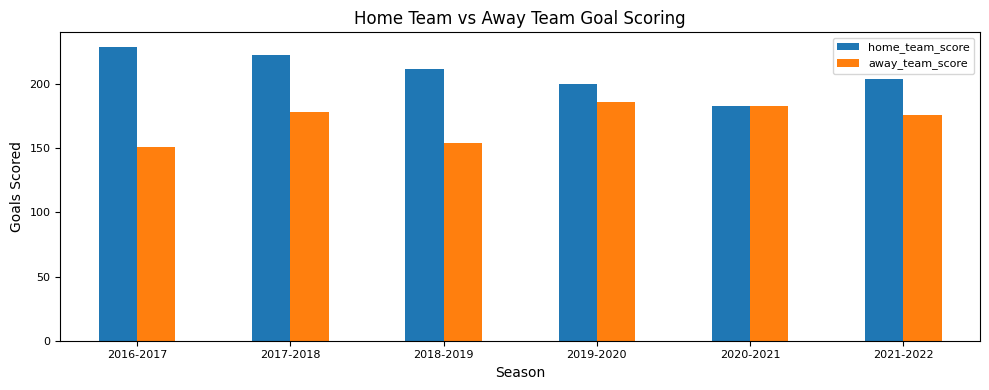

In [1103]:
goal_counts_ha.groupby('season')[['home_team_score', 'away_team_score']].sum().plot(kind = 'bar', figsize = (10,4))

plt.xlabel("Season")
plt.ylabel("Goals Scored")
plt.title("Home Team vs Away Team Goal Scoring")
plt.legend(fontsize=8)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

So, home teams typically have the upper hand when it comes to scoring, fueled by the energy and support of their fans in the stadium. But something unusual happened in the **2020-2021 season** home and away teams scored almost the same number of goals. With the pandemic forcing matches to be played in empty stadiums or neutral venues, the usual home-field advantage seemed to disappear, making the games much more evenly balanced.


---



In [1104]:
df_matches_goals.head(2)

,match_id,season,home_team,away_team,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,goal_id,player_id,duration,assist_id,goal_desc
0,mt1,2021-2022,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl1,ply643,16,ply655,header
1,mt1,2021-2022,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl2,ply727,28,NaN,own goal


### **Goal Scoring trends in different times of the match**

Next analysis aims to provide insights into when goals are most frequently scored during matches. To achieve this, we have divided the match duration into 15-minute intervals, allowing us to examine the timing of goals more granularly. A pie chart will illustrate the percentage distribution of goals across these intervals, highlighting periods of peak scoring activity.

```
The groupby() method in pandas is used for grouping data based on a specific column or set of columns.

pd.cut() is specifically designed to divide continuous data into intervals (bins)


```



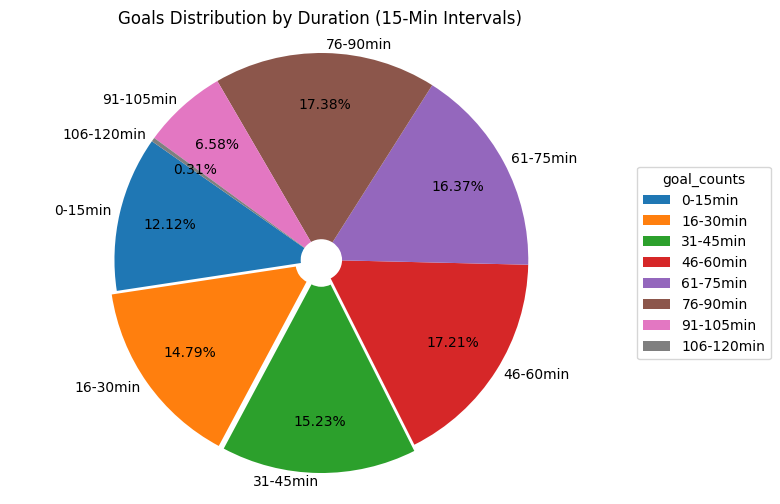

In [1105]:
bins = [0, 15, 30, 45, 60, 75, 90, 105, 120]
labels = ['0-15min', '16-30min', '31-45min', '46-60min', '61-75min', '76-90min', '91-105min', '106-120min']

# Grouping goals into the bins
df_matches_goals['duration_bin'] = pd.cut(df_matches_goals['duration'], bins=bins, labels=labels, right=False)

# Counting the number of goals in each interval
goal_counts = df_matches_goals['duration_bin'].value_counts(sort=False)


# Plotting the pie chart

plt.figure(figsize=(8, 6))

plt.pie(goal_counts, labels=goal_counts.index,
        autopct='%1.2f%%', startangle=145,
        wedgeprops=dict(width=0.9),
        explode = (0, 0.03, 0.03, 0,0,0,0,0),
        pctdistance=0.75, labeldistance=1.04)

plt.legend(goal_counts.index, title="goal_counts", loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.title("Goals Distribution by Duration (15-Min Intervals)")
plt.axis('equal')

plt.show()

The analysis reveals that the top three periods for goal scoring are notably concentrated towards the end of the match. The **76-90** minute interval leads with **17.38%** of goals, closely followed by the **46-60** minute period at 17.**21%**, and the **61-75** minute interval with** 16.37%**.

In contrast, the lowest goal percentages are observed during extra time, particularly in the **91-105** minute interval, which accounts for just **6.58%** of goals, and the **106-120** minute stretch, representing a mere **0.31%**. This distribution shows when goals are most likely to happen during a match, especially in regular time. It also points out that goals are less frequent during extra time in knockout matches.

---



### **Different types of goals**

This analysis captures the diverse methods players use to score, from the dominant right-footed shots and headers to the rare and skillful free kicks and bicycle kicks.

In [1106]:
df_matches_goals['goal_desc'].unique()

array(['header', 'own goal', 'penalty', 'right-footed shot',
       'left-footed shot', 'free kick', 'back heel', 'bicycle kick', nan,
       'ind. free kick'], dtype=object)

In [1107]:
goal_type_counts = df_matches_goals['goal_desc'].value_counts()
goal_type_counts

,count
goal_desc,
right-footed shot,956
left-footed shot,632
header,323
penalty,223
own goal,71
free kick,46
bicycle kick,7
back heel,4
ind. free kick,1


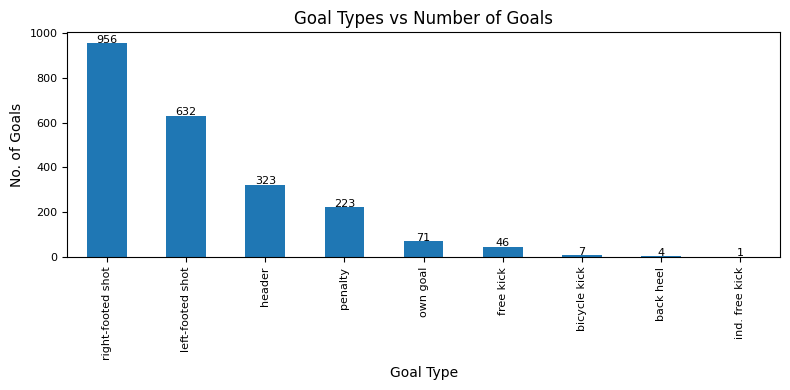

In [1108]:
goal_type_counts.plot(kind='bar',figsize=(8,4))

plt.xlabel("Goal Type",fontsize=10)
plt.ylabel("No. of Goals",fontsize=10)

# Show the values on top of each bar
for index, value in enumerate(goal_type_counts):
    plt.text(index, value + 1.5, str(value), ha='center', fontsize=8)

plt.title("Goal Types vs Number of Goals")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

The data shows that **right-footed shots** are the most common way to score, with **956 goals**, followed by **left-footed shots** at **632 goals**. **Headers** are responsible for **323 goals**, showing how important aerial play can be. **Penalties** have resulted in **223 goals**, while **own goals** have happened **71 times**. There have been **46 goals** from **free kicks**, and rarer but exciting goals like **bicycle kicks** (7) and **back heels** (4) also appear. Finally, just **1 goal** has come from an **indirect free kick**. This variety highlights the many ways players find the back of the net in football.

---



### **Preparing data for further analysis**

In [1109]:
df_matches_goals.head(2)

,match_id,season,home_team,away_team,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,goal_id,player_id,duration,assist_id,goal_desc,duration_bin
0,mt1,2021-2022,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl1,ply643,16,ply655,header,16-30min
1,mt1,2021-2022,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,gl2,ply727,28,NaN,own goal,16-30min


In [1110]:
df_players_goal = df_matches_goals.drop(["home_team","away_team","stadium","attendance",
                       "home_team_score","away_team_score","penalty_shoot_out",
                       "duration","duration_bin","goal_desc"], axis=1)

df_players_goal.head(2)

,match_id,season,goal_id,player_id,assist_id
0,mt1,2021-2022,gl1,ply643,ply655
1,mt1,2021-2022,gl2,ply727,NaN


In [1111]:
df_players.head(2)

,player_id,nationality,dob,team,jersey_number,position,foot,full_name
0,ply510,Brazil,1991-07-15,Juventus,6.0,Defender,R,Danilo
1,ply511,Italy,1992-10-20,Juventus,2.0,Defender,R,Mattia De Sciglio


In [1112]:
df_players.drop(["jersey_number"], axis=1,inplace=True)

df_players_goal_merged = pd.merge(df_players, df_players_goal, on='player_id', how='inner')
df_players_goal_merged.head(2)

,player_id,nationality,dob,team,position,foot,full_name,match_id,season,goal_id,assist_id
0,ply513,Italy,1994-07-29,Juventus,Defender,R,Daniele Rugani,mt714,2016-2017,gl2177,ply1076
1,ply519,USA,1998-08-28,Juventus,Midfielder,R,Weston McKennie,mt209,2020-2021,gl622,ply509


In [1113]:
df_players_goal_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   player_id    2120 non-null   object        
 1   nationality  2120 non-null   object        
 2   dob          2120 non-null   datetime64[ns]
 3   team         1557 non-null   object        
 4   position     2120 non-null   object        
 5   foot         1944 non-null   object        
 6   full_name    2120 non-null   object        
 7   match_id     2120 non-null   object        
 8   season       2120 non-null   object        
 9   goal_id      2120 non-null   object        
 10  assist_id    1515 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 182.3+ KB


In [1114]:
df_players_goal_merged["player_id"]=df_players_goal_merged["full_name"]

df_players_goal_merged.drop(["full_name"], axis=1,inplace=True)

df_players_goal_merged.rename(columns={'player_id': 'player_name'}, inplace=True)
df_players_goal_merged.rename(columns={'assist_id': 'assist_count'}, inplace=True)
df_players_goal_merged.rename(columns={'goal_id': 'goal_count'}, inplace=True)

df_players_goal_merged.head(2)

,player_name,nationality,dob,team,position,foot,match_id,season,goal_count,assist_count
0,Daniele Rugani,Italy,1994-07-29,Juventus,Defender,R,mt714,2016-2017,gl2177,ply1076
1,Weston McKennie,USA,1998-08-28,Juventus,Midfielder,R,mt209,2020-2021,gl622,ply509


### **Assists**

In [1115]:
# Finding Top Assist Providers

top_assist = df_players_goal_merged.groupby('player_name')['assist_count'].count().reset_index()
top_assist = top_assist.sort_values(by='assist_count', ascending=False)

top_assist.head(10)

,player_name,assist_count
161,Cristiano Ronaldo,36
523,Robert Lewandowski,33
341,Karim Benzema,32
362,Lionel Messi,29
352,Kylian Mbappé,28
506,Raheem Sterling,20
542,Sadio Mané,20
447,Mo Salah,18
107,Antoine Griezmann,17
222,Erling Haaland,17


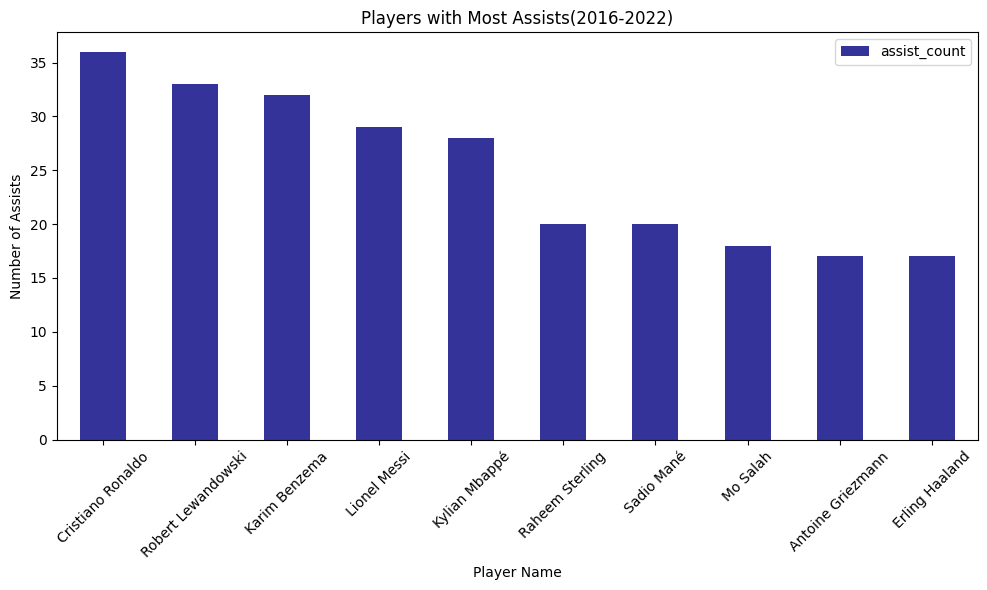

In [1116]:
#Plotting the Data

top10_assist = top_assist.head(10)

top10_assist.set_index('player_name', inplace=True)

top10_assist.plot(kind="bar",figsize=(10, 6),color='navy',alpha=0.8)

plt.xlabel("Player Name",fontsize=10)
plt.ylabel("Number of Assists",fontsize=10)
plt.title("Players with Most Assists(2016-2022)",fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(rotation=45,fontsize=10)
plt.tight_layout()
plt.show()


In the world of football, assists are just as vital as goals, showcasing a player's vision and teamwork. Over the past few seasons, **Cristiano Ronaldo** has proven to be not only a prolific scorer but also a skilled playmaker, leading the pack with **36** assists. Close behind, **Robert Lewandowski** and **Karim Benzema** displayed their creativity with **33** and **32** assists, respectively. The legendary **Lionel Messi** continues to impress, contributing **29** assists, while young superstar **Kylian Mbappé** added **28** to his tally. Notably, **Raheem Sterling** and **Sadio Mané** each provided **20** assists, showcasing their ability to set up their teammates for success. Additionally, **Mo Salah** delivered **18** assists, while both **Antoine Griezmann** and **Erling Haaland** wrapped up the list with **17** assists each. This impressive display of playmaking ability highlights the crucial role these players play in their teams' success, emphasizing the importance of collaboration in achieving victory on the pitch.

---

### **Top Scorers**

In [1117]:
# Finding Top Scorers

top_scorer = df_players_goal_merged.groupby('player_name')['goal_count'].count().reset_index()
top_scorer = top_scorer.sort_values(by='goal_count', ascending=False)

top_scorer.head(10)

,player_name,goal_count
523,Robert Lewandowski,54
161,Cristiano Ronaldo,47
362,Lionel Messi,42
341,Karim Benzema,40
352,Kylian Mbappé,33
447,Mo Salah,33
40,Neymar,24
542,Sadio Mané,24
222,Erling Haaland,23
506,Raheem Sterling,22


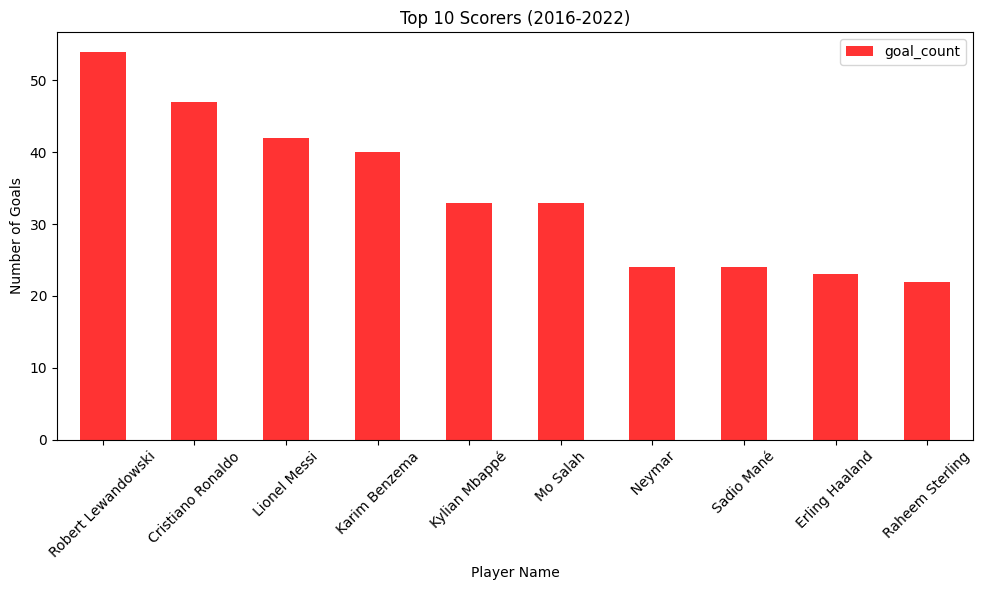

In [1118]:
#Plotting the data

top10_scorer = top_scorer.head(10)

top10_scorer.set_index('player_name', inplace=True)

top10_scorer.plot(kind="bar",figsize=(10, 6),color='red',alpha=0.8)

plt.xlabel("Player Name",fontsize=10)
plt.ylabel("Number of Goals",fontsize=10)
plt.title("Top 10 Scorers (2016-2022)",fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(rotation=45,fontsize=10)
plt.tight_layout()
plt.show()

In recent years, **Cristiano Ronaldo** and **Lionel Messi** have firmly established themselves as two of the greatest footballers in history, mesmerizing fans with their incredible goal-scoring skills and dedication to the game.

From *2016 to 2022*, **Robert Lewandowski** topped the charts with an astonishing **54** goals. Not far behind, **Cristiano Ronaldo** and **Lionel Messi** continued to shine, scoring **47** and **42** goals, respectively. **Karim Benzema** also made his mark with **40** goals, while younger stars like **Kylian Mbappe** and **Mohamed Salah** added **33** goals each to their impressive resumes. **Neymar** and **Sadio Mane** both found the net **24** times, and **Erling Haaland** and **Raheem Sterling** contributed **23** and **22** goals, respectively. This impressive lineup showcases not only the competitive spirit of these players but also the exciting talent in the world of football today.

---



### **Goals and Assists based on Position**



In this analysis, we'll explore how different player positions contribute to the goal-scoring and assist tally in football.

In [1119]:
df_players_goal_merged["position"].unique()

array(['Defender', 'Midfielder', 'Forward', 'Goalkeeper'], dtype=object)

In [1120]:
positional_impact_goal = df_players_goal_merged.groupby('position')['goal_count'].count().reset_index()
positional_impact_goal = positional_impact_goal.sort_values(by='goal_count', ascending=False)

positional_impact_goal

,position,goal_count
1,Forward,1345
3,Midfielder,510
0,Defender,260
2,Goalkeeper,5


In [1121]:
positional_impact_assist = df_players_goal_merged.groupby('position')['assist_count'].count().reset_index()
positional_impact_assist = positional_impact_assist.sort_values(by='assist_count', ascending=False)

positional_impact_assist

,position,assist_count
1,Forward,1008
3,Midfielder,340
0,Defender,167
2,Goalkeeper,0


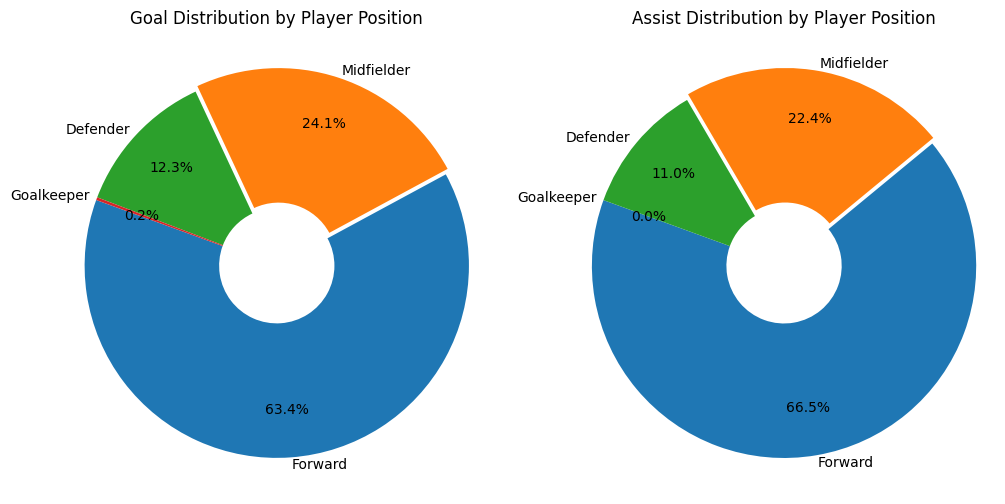

In [1128]:
#plotting the goal data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.pie(positional_impact_goal['goal_count'],
        labels=positional_impact_goal['position'],
        autopct='%1.1f%%', startangle=160,
        wedgeprops=dict(width=0.7),
        explode = (0, 0.03,0,0),
        pctdistance=0.75, labeldistance=1.04)
plt.title('Goal Distribution by Player Position')
plt.axis('equal')


#plotting the assist data

plt.subplot(1, 2, 2)

plt.pie(positional_impact_assist['assist_count'],
        labels=positional_impact_assist['position'],
        autopct='%1.1f%%', startangle=160,
        wedgeprops=dict(width=0.7),
        explode = (0, 0.03,0,0),
        pctdistance=0.75, labeldistance=1.04)
plt.title('Assist Distribution by Player Position')


plt.axis('equal')
plt.show()